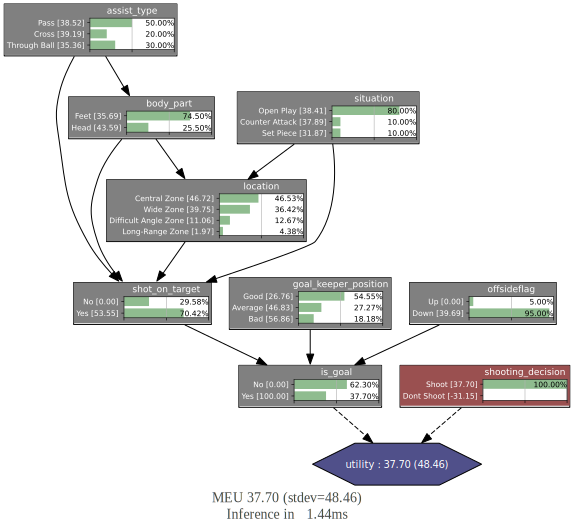

In [44]:
from pylab import *
import matplotlib.pyplot as plt
import os
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import numpy as np
import pyAgrum as gum

#Whether or not a goal is scored
# Create a Bayesian Network
import pyAgrum as gum

# Create an Influence Diagram
idm = gum.InfluenceDiagram()

assist_type = idm.add(gum.LabelizedVariable("assist_type", "assist_type", ['Pass', 'Cross','Through Ball']))
situation = idm.add(gum.LabelizedVariable("situation", "situation", ['Open Play', 'Counter Attack','Set Piece'])) # Open Play, Counter Attack, Set Piece
body_part = idm.add(gum.LabelizedVariable("body_part", "body_part", ['Feet', 'Head'])) #Feet ,  Head
location = idm.add(gum.LabelizedVariable("location", "location", ['Central Zone', 'Wide Zone','Difficult Angle Zone', 'Long-Range Zone' ])) #Central zone:(centre of the box and penalty spot),Wide zone(left-wing, right-wing,left side of the six-yard box, right side of the box, and right side of the six-yard box),Difficult angle zone(difficult angle and long-range, difficult angle on the left, and difficult angle on the right),Long-range zone(long-range, more than 35 yards, and more than 40 yards)
shot_on_target = idm.add(gum.LabelizedVariable("shot_on_target", "shot_on_target", ['No', 'Yes'])) 
is_goal = idm.add(gum.LabelizedVariable("is_goal", "is_goal", ['No', 'Yes'])) 
goal_keeper_position = idm.add(gum.LabelizedVariable("goal_keeper_position", "goal_keeper_position", ['Good', 'Average', 'Bad'])) # Good positioning, avergage poisitioning, Bad positioning(Far Off)
offsideflag = idm.add(gum.LabelizedVariable("offsideflag", "offsideflag", ['Up', 'Down'])) #FlagUp (No Goal) ,  Flag Down(Goal)


# Add decision node
shooting_decision = idm.addDecisionNode(gum.LabelizedVariable("shooting_decision", "shooting_decision", ['Shoot', 'Dont Shoot' ])) # Shoot, Don't Shoot

# Add utility node
# Add utility node
utility = idm.addUtilityNode(gum.LabelizedVariable("utility", "utility", 1)) # Single label for utility value

#
# Add arcs (directed edges) between nodes
idm.addArc(situation, location)
idm.addArc(assist_type, body_part)
idm.addArc(body_part, location)
idm.addArc(location, shot_on_target)
idm.addArc(body_part, shot_on_target)
idm.addArc(assist_type, shot_on_target)
idm.addArc(situation, shot_on_target)

idm.addArc(shot_on_target,is_goal)
idm.addArc(goal_keeper_position,is_goal)
idm.addArc(is_goal, utility)
idm.addArc(shooting_decision,utility )
idm.addArc(offsideflag, is_goal)
# Define conditional probability tables (CPTs)
idm.cpt(offsideflag).fillWith([0.05,0.95]) # flag up, flag down
idm.cpt(goal_keeper_position).fillWith([0.6, 0.3, 0.2])  # good positioning, Average positioning , Bad(Far off )positioning
idm.cpt(assist_type).fillWith([0.5, 0.2, 0.3]) # Pass, Cross, Throughl Ball


idm.cpt(situation).fillWith([0.8, 0.1, 0.1]) # Open Play, Counter Attack, Set Piece

idm.cpt(body_part)[{'assist_type': 'Pass'}] = [0.8, 0.2]
idm.cpt(body_part)[{'assist_type': 'Cross'}] = [0.3, 0.7]
idm.cpt(body_part)[{'assist_type': 'Through Ball'}] = [0.95, 0.05]
#Situation: Open Play, Body_part: Feet
idm.cpt(location)[{'situation': 'Open Play', 'body_part': 'Feet'}] = [0.4, 0.4, 0.15, 0.05] # Central zone, Wide zone, Difficult angle zone, Long-range zone

#Situation: Open Play, Body_part: Head
idm.cpt(location)[{'situation': 'Open Play', 'body_part': 'Head'}] = [0.7, 0.25, 0.04, 0.01] # Central zone, Wide zone, Difficult angle zone, Long-range zone

#Situation: Counter Attack, Body_part: Feet
idm.cpt(location)[{'situation': 'Counter Attack', 'body_part': 'Feet'}] = [0.3, 0.5, 0.15, 0.05] # Central zone, Wide zone, Difficult angle zone, Long-range zone

#Situation: Counter Attack, Body_part: Head
idm.cpt(location)[{'situation': 'Counter Attack', 'body_part': 'Head'}] = [0.6, 0.3, 0.08, 0.02] # Central zone, Wide zone, Difficult angle zone, Long-range zone

#Situation: Set Piece, Body_part: Feet
idm.cpt(location)[{'situation': 'Set Piece', 'body_part': 'Feet'}] = [0.35, 0.35, 0.2, 0.1] # Central zone, Wide zone, Difficult angle zone, Long-range zone

#Situation: Set Piece, Body_part: Head
idm.cpt(location)[{'situation': 'Set Piece', 'body_part': 'Head'}] = [0.8, 0.15, 0.04, 0.01] # Central zone, Wide zone, Difficult angle zone, Long-range zone

# Situation: Open Play, Assist_type: Pass
idm.cpt(shot_on_target)[{'situation': 'Open Play', 'assist_type': 'Pass', 'body_part': 'Feet', 'location': 'Central Zone'}] = [0.1, 0.9]  # Feet, Central zone
idm.cpt(shot_on_target)[{'situation': 'Open Play', 'assist_type': 'Pass', 'body_part': 'Feet', 'location': 'Wide Zone'}] = [0.2, 0.8]  # Feet, Wide zone
idm.cpt(shot_on_target)[{'situation': 'Open Play', 'assist_type': 'Pass', 'body_part': 'Feet', 'location': 'Difficult Angle Zone'}] = [0.7, 0.3]  # Feet, Difficult angle zone
idm.cpt(shot_on_target)[{'situation': 'Open Play', 'assist_type': 'Pass', 'body_part': 'Feet', 'location': 'Long-Range Zone'}] = [0.95, 0.05]  # Feet, Long-range zone
idm.cpt(shot_on_target)[{'situation': 'Open Play', 'assist_type': 'Pass', 'body_part': 'Head', 'location': 'Central Zone'}] = [0.15, 0.85]  # Head, Central zone
idm.cpt(shot_on_target)[{'situation': 'Open Play', 'assist_type': 'Pass', 'body_part': 'Head', 'location': 'Wide Zone'}] = [0.3, 0.7]  # Head, Wide zone
idm.cpt(shot_on_target)[{'situation': 'Open Play', 'assist_type': 'Pass', 'body_part': 'Head', 'location': 'Difficult Angle Zone'}] = [0.9, 0.1]  # Head, Difficult angle zone
idm.cpt(shot_on_target)[{'situation': 'Open Play', 'assist_type': 'Pass', 'body_part': 'Head', 'location': 'Long-Range Zone'}] = [0.99, 0.01]  # Head, Long-range zone

# Situation: Open Play, Assist_type: Cross
idm.cpt(shot_on_target)[{'situation': 'Open Play', 'assist_type': 'Cross', 'body_part': 'Feet', 'location': 'Central Zone'}] = [0.6, 0.4]  # Feet, Central zone
idm.cpt(shot_on_target)[{'situation': 'Open Play', 'assist_type': 'Cross', 'body_part': 'Feet', 'location': 'Wide Zone'}] = [0.4, 0.6]  # Feet, Wide zone
idm.cpt(shot_on_target)[{'situation': 'Open Play', 'assist_type': 'Cross', 'body_part': 'Feet', 'location': 'Difficult Angle Zone'}] = [0.8, 0.2]  # Feet, Difficult angle zone
idm.cpt(shot_on_target)[{'situation': 'Open Play', 'assist_type': 'Cross', 'body_part': 'Feet', 'location':'Long-Range Zone'}] = [0.98, 0.02]  # Feet, Long-range zone
idm.cpt(shot_on_target)[{'situation': 'Open Play', 'assist_type': 'Cross', 'body_part': 'Head', 'location': 'Central Zone'}] = [0.05, 0.95]  # Head, Central zone
idm.cpt(shot_on_target)[{'situation': 'Open Play', 'assist_type': 'Cross', 'body_part': 'Head', 'location': 'Wide Zone'}] = [0.15, 0.85]  # Head, Wide zone
idm.cpt(shot_on_target)[{'situation': 'Open Play', 'assist_type': 'Cross', 'body_part': 'Head', 'location': 'Difficult Angle Zone'}] = [0.95, 0.05]  # Head, Difficult angle zone
idm.cpt(shot_on_target)[{'situation': 'Open Play', 'assist_type': 'Cross', 'body_part': 'Head', 'location': 'Long-Range Zone'}] = [0.99, 0.01]  # Head, Long-range zone

# Situation: Open Play, Assist_type: Through ball
idm.cpt(shot_on_target)[{'situation': 'Open Play', 'assist_type': 'Through Ball', 'body_part':'Feet', 'location': 'Central Zone'}] = [0.1, 0.9]  # Feet, Central zone
idm.cpt(shot_on_target)[{'situation': 'Open Play', 'assist_type': 'Through Ball', 'body_part': 'Feet', 'location': 'Wide Zone'}] = [0.3, 0.7]  # Feet, Wide zone
idm.cpt(shot_on_target)[{'situation': 'Open Play', 'assist_type': 'Through Ball', 'body_part': 'Feet', 'location': 'Difficult Angle Zone'}] = [0.85, 0.15]  # Feet, Difficult angle zone
idm.cpt(shot_on_target)[{'situation': 'Open Play', 'assist_type': 'Through Ball', 'body_part': 'Feet', 'location': 'Long-Range Zone'}] = [0.97, 0.03]  # Feet, Long-range zone
idm.cpt(shot_on_target)[{'situation': 'Open Play', 'assist_type': 'Through Ball', 'body_part': 'Head', 'location': 'Central Zone'}] = [0.2, 0.8]  # Head, Central zone
idm.cpt(shot_on_target)[{'situation': 'Open Play', 'assist_type': 'Through Ball', 'body_part': 'Head', 'location': 'Wide Zone'}] = [0.4, 0.6]  # Head, Wide zone
idm.cpt(shot_on_target)[{'situation': 'Open Play', 'assist_type': 'Through Ball', 'body_part': 'Head', 'location': 'Difficult Angle Zone'}] = [0.95, 0.05]  # Head, Difficult angle zone
idm.cpt(shot_on_target)[{'situation': 'Open Play', 'assist_type': 'Through Ball', 'body_part': 'Head', 'location': 'Long-Range Zone'}] = [0.99, 0.01]  # Head, Long-range zone

# Situation: Counter Attack, Assist_type: Pass
idm.cpt(shot_on_target)[{'situation': 'Counter Attack', 'assist_type': 'Pass', 'body_part': 'Feet', 'location': 'Wide Zone'}] = [0.25, 0.75]  # Feet, Wide zone
idm.cpt(shot_on_target)[{'situation': 'Counter Attack', 'assist_type': 'Pass', 'body_part': 'Feet', 'location': 'Central Zone'}] = [0.08, 0.92]  # Feet, Central zone
idm.cpt(shot_on_target)[{'situation': 'Counter Attack', 'assist_type': 'Pass', 'body_part': 'Feet', 'location': 'Difficult Angle Zone'}] = [0.8, 0.2]  # Feet, Difficult angle zone
idm.cpt(shot_on_target)[{'situation': 'Counter Attack', 'assist_type': 'Pass', 'body_part': 'Feet', 'location': 'Long-Range Zone'}] = [0.95, 0.05]  # Feet, Long-range zone
idm.cpt(shot_on_target)[{'situation': 'Counter Attack', 'assist_type': 'Pass', 'body_part': 'Head', 'location': 'Central Zone'}] = [0.2, 0.8]  # Head, Central zone
idm.cpt(shot_on_target)[{'situation': 'Counter Attack', 'assist_type': 'Pass', 'body_part': 'Head', 'location': 'Wide Zone'}] = [0.4, 0.6]  # Head, Wide zone
idm.cpt(shot_on_target)[{'situation': 'Counter Attack', 'assist_type': 'Pass', 'body_part': 'Head', 'location': 'Difficult Angle Zone'}] = [0.9, 0.1]  # Head, Difficult angle zone
idm.cpt(shot_on_target)[{'situation': 'Counter Attack', 'assist_type': 'Pass', 'body_part': 'Head', 'location': 'Long-Range Zone'}] = [0.98, 0.02]  # Head, Long-range zone

#Situation: Counter Attack, Assist_type: Cross
idm.cpt(shot_on_target)[{'situation': 'Counter Attack', 'assist_type': 'Cross', 'body_part': 'Feet', 'location': 'Central Zone'}] = [0.15, 0.85] # Feet, Central zone
idm.cpt(shot_on_target)[{'situation': 'Counter Attack', 'assist_type': 'Cross', 'body_part': 'Feet', 'location': 'Wide Zone'}] = [0.35, 0.65] # Feet, Wide zone
idm.cpt(shot_on_target)[{'situation': 'Counter Attack', 'assist_type': 'Cross', 'body_part': 'Feet', 'location': 'Difficult Angle Zone'}] = [0.75, 0.25] # Feet, Difficult angle zone
idm.cpt(shot_on_target)[{'situation': 'Counter Attack', 'assist_type': 'Cross', 'body_part': 'Feet', 'location': 'Long-Range Zone'}] = [0.96, 0.04] # Feet, Long-range zone
idm.cpt(shot_on_target)[{'situation': 'Counter Attack', 'assist_type': 'Cross', 'body_part': 'Head', 'location': 'Central Zone'}] = [0.05, 0.95] # Head, Central zone
idm.cpt(shot_on_target)[{'situation': 'Counter Attack', 'assist_type': 'Cross', 'body_part': 'Head', 'location': 'Wide Zone'}] = [0.12, 0.88] # Head, Wide zone
idm.cpt(shot_on_target)[{'situation': 'Counter Attack', 'assist_type': 'Cross', 'body_part': 'Head', 'location': 'Difficult Angle Zone'}] = [0.94, 0.06] # Head, Difficult angle zone
idm.cpt(shot_on_target)[{'situation': 'Counter Attack', 'assist_type': 'Cross', 'body_part': 'Head', 'location': 'Long-Range Zone'}] = [0.99, 0.01] # Head, Long-range zone


#Situation: Counter Attack, Assist_type: Through ball
idm.cpt(shot_on_target)[{'situation': 'Counter Attack', 'assist_type': 'Through Ball', 'body_part': 'Feet', 'location': 'Central Zone'}] = [0.05, 0.95] # Feet, Central zone
idm.cpt(shot_on_target)[{'situation': 'Counter Attack', 'assist_type': 'Through Ball', 'body_part': 'Feet', 'location': 'Wide Zone'}] = [0.2, 0.8] # Feet, Wide zone
idm.cpt(shot_on_target)[{'situation': 'Counter Attack', 'assist_type': 'Through Ball', 'body_part': 'Feet', 'location': 'Difficult Angle Zone'}] = [0.8, 0.2] # Feet, Difficult angle zone
idm.cpt(shot_on_target)[{'situation': 'Counter Attack', 'assist_type': 'Through Ball', 'body_part': 'Feet', 'location': 'Long-Range Zone'}] = [0.97, 0.03] # Feet, Long-range zone
idm.cpt(shot_on_target)[{'situation': 'Counter Attack', 'assist_type': 'Through Ball', 'body_part': 'Head', 'location': 'Central Zone'}] = [0.3, 0.7] # Head, Central zone
idm.cpt(shot_on_target)[{'situation': 'Counter Attack', 'assist_type': 'Through Ball', 'body_part': 'Head', 'location': 'Wide Zone'}] = [0.5, 0.5] # Head, Wide zone
idm.cpt(shot_on_target)[{'situation': 'Counter Attack', 'assist_type': 'Through Ball', 'body_part': 'Head', 'location': 'Difficult Angle Zone'}] = [0.95, 0.05] # Head, Difficult angle zone
idm.cpt(shot_on_target)[{'situation': 'Counter Attack', 'assist_type': 'Through Ball', 'body_part': 'Head', 'location': 'Long-Range Zone'}] = [0.99, 0.01] # Head, Long-range zone

#Situation: Set Piece, Assist_type: Pass
idm.cpt(shot_on_target)[{'situation': 'Set Piece', 'assist_type': 'Pass', 'body_part': 'Feet', 'location': 'Wide Zone'}] = [0.3, 0.7] # Feet, Wide zone
idm.cpt(shot_on_target)[{'situation': 'Set Piece', 'assist_type': 'Pass', 'body_part': 'Feet', 'location': 'Difficult Angle Zone'}] = [0.9, 0.1] # Feet, Difficult angle zone
idm.cpt(shot_on_target)[{'situation': 'Set Piece', 'assist_type': 'Pass', 'body_part': 'Feet', 'location': 'Central Zone'}] = [0.15, 0.85] # Feet, Central zone
idm.cpt(shot_on_target)[{'situation': 'Set Piece', 'assist_type': 'Pass', 'body_part': 'Feet', 'location': 'Long-Range Zone'}] = [0.98, 0.02] # Feet, Long-range zone
idm.cpt(shot_on_target)[{'situation': 'Set Piece', 'assist_type': 'Pass', 'body_part': 'Head', 'location': 'Central Zone'}] = [0.1, 0.9] # Head, Central zone
idm.cpt(shot_on_target)[{'situation': 'Set Piece', 'assist_type': 'Pass', 'body_part': 'Head', 'location': 'Wide Zone'}] = [0.25, 0.75] # Head, Wide zone
idm.cpt(shot_on_target)[{'situation': 'Set Piece', 'assist_type': 'Pass', 'body_part': 'Head', 'location': 'Difficult Angle Zone'}] = [0.95, 0.05] # Head, Difficult angle zone
idm.cpt(shot_on_target)[{'situation': 'Set Piece', 'assist_type': 'Pass', 'body_part': 'Head', 'location': 'Long-Range Zone'}] = [0.99, 0.01] # Head, Long-range zone

# Situation: Set Piece, Assist_type: Cross
idm.cpt(shot_on_target)[{'situation': 'Set Piece', 'assist_type': 'Cross', 'body_part': 'Feet', 'location': 'Central Zone'}] = [0.7, 0.3]  # Feet, Central zone
idm.cpt(shot_on_target)[{'situation': 'Set Piece', 'assist_type': 'Cross', 'body_part': 'Feet', 'location': 'Wide Zone'}] = [0.5, 0.5]  # Feet, Wide zone
idm.cpt(shot_on_target)[{'situation': 'Set Piece', 'assist_type': 'Cross', 'body_part': 'Feet', 'location': 'Difficult Angle Zone'}] = [0.85, 0.15]  # Feet, Difficult angle zone
idm.cpt(shot_on_target)[{'situation': 'Set Piece', 'assist_type': 'Cross', 'body_part': 'Feet', 'location': 'Long-Range Zone'}] = [0.98, 0.02]  # Feet, Long-range zone
idm.cpt(shot_on_target)[{'situation': 'Set Piece', 'assist_type': 'Cross', 'body_part': 'Head', 'location': 'Central Zone'}] = [0.2, 0.8]  # Head, Central zone
idm.cpt(shot_on_target)[{'situation': 'Set Piece', 'assist_type': 'Cross', 'body_part': 'Head', 'location': 'Wide Zone'}] = [0.6, 0.4]  # Head, Wide zone
idm.cpt(shot_on_target)[{'situation': 'Set Piece', 'assist_type': 'Cross', 'body_part': 'Head', 'location': 'Difficult Angle Zone'}] = [0.9, 0.1]  # Head, Difficult angle zone
idm.cpt(shot_on_target)[{'situation': 'Set Piece', 'assist_type': 'Cross', 'body_part': 'Head', 'location': 'Long-Range Zone'}] = [0.99, 0.01]  # Head, Long-range zone

# Situation: Set Piece, Assist_type: Through ball
idm.cpt(shot_on_target)[{'situation': 'Set Piece', 'assist_type': 'Through Ball', 'body_part': 'Feet', 'location': 'Central Zone'}] = [0.15, 0.85]  # Feet, Central zone
idm.cpt(shot_on_target)[{'situation': 'Set Piece', 'assist_type': 'Through Ball', 'body_part': 'Feet', 'location': 'Wide Zone'}] = [0.4, 0.6]  # Feet, Wide zone
idm.cpt(shot_on_target)[{'situation': 'Set Piece', 'assist_type': 'Through Ball', 'body_part': 'Feet', 'location': 'Difficult Angle Zone'}] = [0.8, 0.2]  # Feet, Difficult angle zone
idm.cpt(shot_on_target)[{'situation': 'Set Piece', 'assist_type': 'Through Ball', 'body_part': 'Feet', 'location': 'Long-Range Zone'}] = [0.95, 0.05]  # Feet, Long-range zone
idm.cpt(shot_on_target)[{'situation': 'Set Piece', 'assist_type': 'Through Ball', 'body_part': 'Head', 'location': 'Central Zone'}] = [0.2, 0.8]  # Head, Central zone
idm.cpt(shot_on_target)[{'situation': 'Set Piece', 'assist_type': 'Through Ball', 'body_part': 'Head', 'location': 'Wide Zone'}] = [0.3, 0.7]  # Head, Wide zone
idm.cpt(shot_on_target)[{'situation': 'Set Piece', 'assist_type': 'Through Ball', 'body_part': 'Head', 'location': 'Difficult Angle Zone'}] = [0.9, 0.1]  # Head, Difficult angle zone
idm.cpt(shot_on_target)[{'situation': 'Set Piece', 'assist_type': 'Through Ball', 'body_part': 'Head', 'location': 'Long-Range Zone'}] = [0.98, 0.02]  # Head, Long-range zone

idm.cpt(is_goal)[{'shot_on_target': 'No', 'goal_keeper_position': 'Good', 'offsideflag': 'Up'}] = [1, 0] # No shot on target, good goalkeeper positioning, offside flag up
idm.cpt(is_goal)[{'shot_on_target': 'No', 'goal_keeper_position': 'Good', 'offsideflag': 'Down'}] = [1, 0] # No shot on target, good goalkeeper positioning, offside flag down
idm.cpt(is_goal)[{'shot_on_target': 'No', 'goal_keeper_position': 'Average', 'offsideflag': 'Up'}] = [1, 0] # No shot on target, average goalkeeper positioning, offside flag up
idm.cpt(is_goal)[{'shot_on_target': 'No', 'goal_keeper_position': 'Average', 'offsideflag': 'Down'}] = [1, 0] # No shot on target, average goalkeeper positioning, offside flag down
idm.cpt(is_goal)[{'shot_on_target': 'No', 'goal_keeper_position': 'Bad', 'offsideflag': 'Up'}] = [1, 0] # No shot on target, bad goalkeeper positioning, offside flag up
idm.cpt(is_goal)[{'shot_on_target': 'No', 'goal_keeper_position': 'Bad', 'offsideflag': 'Down'}] = [1, 0] # No shot on target, bad goalkeeper positioning, offside flag down

idm.cpt(is_goal)[{'shot_on_target': "Yes", 'goal_keeper_position': 'Good', 'offsideflag': 'Up'}] = [1, 0] # Shot on target, good goalkeeper positioning, offside flag up
idm.cpt(is_goal)[{'shot_on_target': 'Yes', 'goal_keeper_position': 'Good', 'offsideflag': 'Down'}] = [0.6, 0.4] # Shot on target, good goalkeeper positioning, offside flag down
idm.cpt(is_goal)[{'shot_on_target': 'Yes', 'goal_keeper_position': 'Average', 'offsideflag': 'Up'}] = [1, 0] # Shot on target, average goalkeeper positioning, offside flag up
idm.cpt(is_goal)[{'shot_on_target': 'Yes', 'goal_keeper_position': 'Average', 'offsideflag': 'Down'}] = [0.3, 0.7] # Shot on target, average goalkeeper positioning, offside flag down
idm.cpt(is_goal)[{'shot_on_target': 'Yes', 'goal_keeper_position': 'Bad', 'offsideflag': 'Up'}] = [1, 0] # Shot on target, bad goalkeeper positioning, offside flag up
idm.cpt(is_goal)[{'shot_on_target': 'Yes', 'goal_keeper_position': 'Bad', 'offsideflag': 'Down'}] = [0.15, 0.85] # Shot on target, bad goalkeeper positioning, offside flag down


# Define utility table
# Fill in utility values
idm.utility(utility)[{'shooting_decision': 'Shoot', 'is_goal': 'No'}] = 0
idm.utility(utility)[{'shooting_decision': 'Shoot', 'is_goal': 'Yes'}] = 100
idm.utility(utility)[{'shooting_decision': 'Dont Shoot', 'is_goal': 'No'}] = -50
idm.utility(utility)[{'shooting_decision': 'Dont Shoot', 'is_goal': 'Yes'}] = 0



from IPython.core.display import HTML
gnb.showInference(idm,evs={})


In [60]:
idm

(pyAgrum.InfluenceDiagram<double>@0x7fe0b13c2200) Influence Diagram{
  chance: 8,
  utility: 1,
  decision: 1,
  arcs: 12,
  domainSize: 3456
}

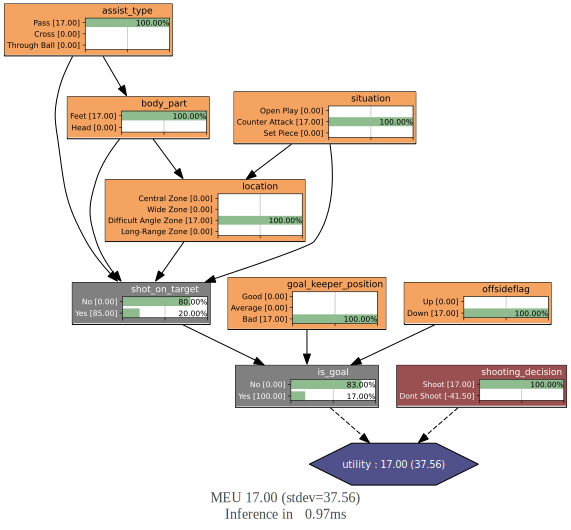

In [45]:

#Messi's Solo Run 
gnb.showInference(idm,evs= {"assist_type": 0, "situation": 1, "body_part": 0, "location": 2, "goal_keeper_position": 2, "offsideflag": 1})

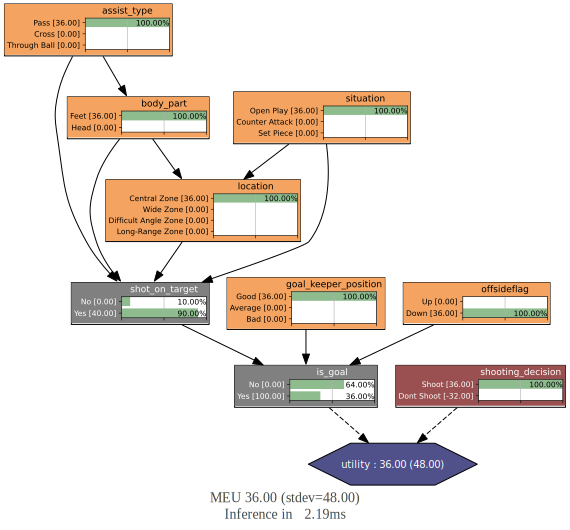

In [46]:


#Zidane's Volley
gnb.showInference(idm,evs= {"assist_type": 0, "situation": 0, "body_part": 0, "location": 0, "goal_keeper_position": 0, "offsideflag": 1})

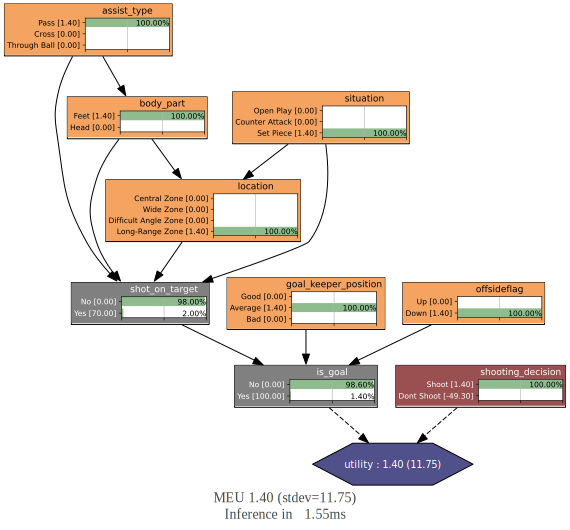

In [47]:


#Ronaldo's Long Range
gnb.showInference(idm,evs= {"assist_type": 0, "situation": 2, "body_part": 0, "location": 3, "goal_keeper_position": 1, "offsideflag": 1})

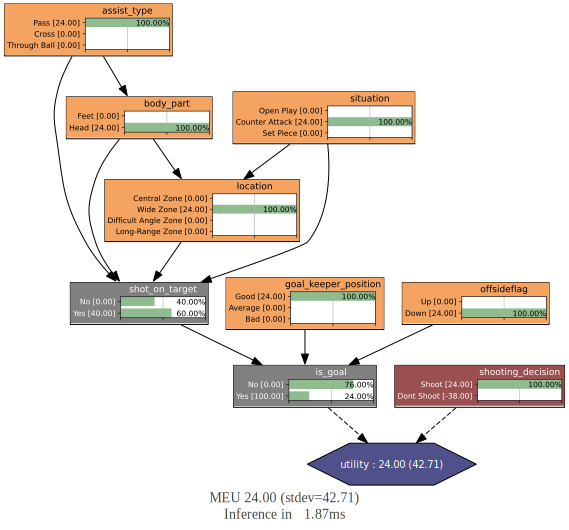

In [48]:
#Maradona's Hand of God
gnb.showInference(idm,evs= {"assist_type": 0, "situation": 1, "body_part": 1, "location": 1, "goal_keeper_position": 0, "offsideflag": 1})


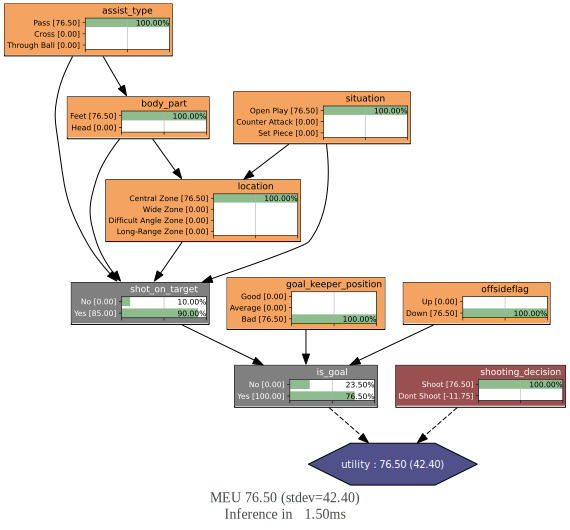

In [49]:
#Messi's second goal in World Cup final
gnb.showInference(idm,evs= {"assist_type": 0, "situation": 0, "body_part": 0, "location": 0, "goal_keeper_position": 2, "offsideflag": 1})



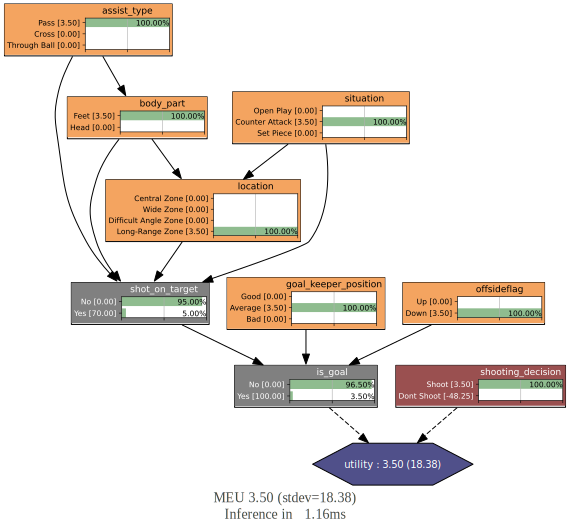

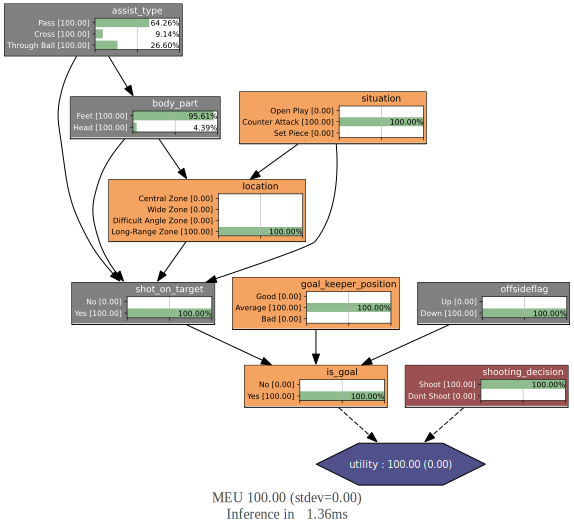

In [66]:
#Sports Analysis Department 
#Watch over the match and see if doing something else would increase the utility

gnb.showInference(idm,evs= {"assist_type": 0, "situation": 1, "body_part": 0, "location": 3, "goal_keeper_position": 1, "offsideflag": 1})
gnb.showInference(idm,evs= { "situation": 1,  "location": 3,  "is_goal": 1, "goal_keeper_position": 1})